In [11]:
# sam_area = annots[0]['area']
# sam_segs = annots[0]['segmentation']

# cnt = 0
# for obj in sam_segs:
#     for point in obj:
#         cnt += 1

# print(sam_area)
# print(cnt/2)

6307.5
741.0


In [5]:
from PIL import Image
import os
from glob import glob
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import albumentations as A
from collections import Counter

In [13]:
json_path = '/opt/ml/segmentation/input/data/train_all.json'
annots = json.load(open(json_path, 'r'))['annotations']
print(annots[0].keys())

classes = ['Background', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic','Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
print(classes)

dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])
['Background', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']


In [12]:
def get_area(seg):
    area = 0
    for obj in seg:
        area += len(obj)/2

    return area

In [18]:
cnt = {}
for cls in classes:
    cnt[cls] = 0

for ann in tqdm(annots):
    cnt[classes[ann['category_id']]] += get_area(ann['segmentation'])

print(cnt)

100%|██████████| 26240/26240 [00:00<00:00, 573577.04it/s]

{'Background': 0, 'General trash': 1092203.0, 'Paper': 4651543.0, 'Paper pack': 260069.0, 'Metal': 290720.0, 'Glass': 318855.0, 'Plastic': 1229625.0, 'Styrofoam': 735460.0, 'Plastic bag': 4395296.0, 'Battery': 27329.0, 'Clothing': 145985.0}


<BarContainer object of 11 artists>

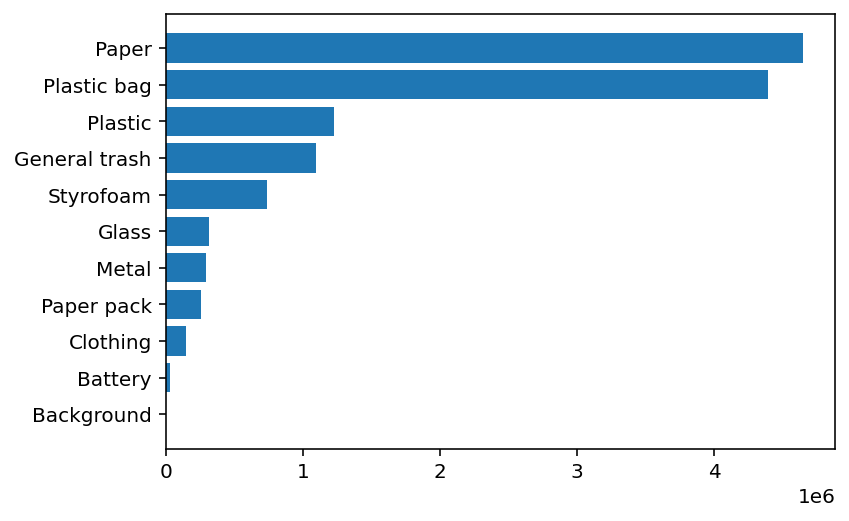

In [23]:
hi = sorted(cnt.items(), key=lambda x: x[1])
xs = [x[0] for x in hi]
ys = [x[1] for x in hi]
plt.barh(xs, ys)